# Synthetic generated data

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)

## 1.
$$f_1(x) = x \cdot sin(x) + 2X$$

In [90]:
y = X * np.sin(X) + 2*X

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=30,
                                                    random_state=42,
                                                    shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

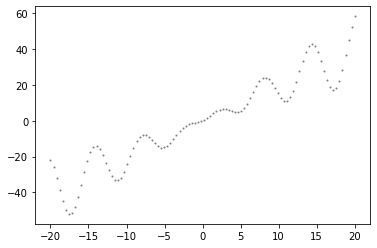

In [91]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=1, c='grey')

A polynomial regression with high polynomial degree (let's say around 15, which is the # of roots of the function)
would work well
Let's try the linear regression first

In [92]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's plot the regression line

In [93]:
def plot_regression_line(reg, label="Regression line", start=0, stop=5):
    # For plots generate 50 linearly spaced samples between start and stop
    x_reg = np.linspace(start, stop, 100)
    y_reg = reg.predict(x_reg[:, np.newaxis])
    plt.plot(x_reg, y_reg, label=label)

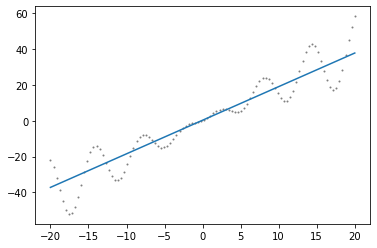

In [94]:
plt.scatter(X, y, s=1, c='grey')
plot_regression_line(reg, start=-tr, stop=tr)

In [95]:
from sklearn.model_selection import cross_val_score
def print_score(reg, x, y):
    r2 = cross_val_score(reg, x[:, np.newaxis], y, cv=5, scoring='r2')
    print("R2: %0.2f (+/- %0.2f)" % (r2.mean(), r2.std() * 2))

In [96]:
print_score(reg, X_test, y_test)

R2: 0.46 (+/- 0.44)


In [97]:
from sklearn.metrics import r2_score
def polynomial_regression(x_train, y_train_, x_test, y_test_, degree):
    # Regression (computed with all data)
    reg_ = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    reg_.fit(x_train[:,np.newaxis], y_train_)

    # Plots
    plt.scatter(x_train, y_train_, s=1, c='grey')
    plt.scatter(x_test, y_test, s=1, c='grey')
    plot_regression_line(reg_, label="d="+str(degree), start=-tr, stop=tr)

    # Score (using cross validation)
    print("Degree = %d" % degree)
    print(r2_score(y_test_, reg_.predict(x_test[:, np.newaxis])))
    

Degree = 10
0.7597861755372383


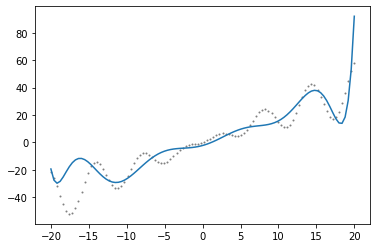

In [98]:
polynomial_regression(X_train, y_train, X_test, y_test, 10)

In [99]:
def inject_noise(y):
    return y + np.random.normal(0, 50, size=y.size)

In [105]:
from sklearn.linear_model import Lasso

# Here we apply Lasso as regularized linear regression
def polynomial_regression_regularized(x_train, y_train, x_test, y_test, degree, noise=False):
    # Regression (computed with all data)
    # Tolerance is the minimum scoring (R2) improvement for the algorithm to continue the optimization
    # if it is too low, the algorithm optimization may not converge
    if noise:
        y_train = inject_noise(y_train)
        y_test = inject_noise(y_test)
    lasso = Lasso(alpha=0.5, tol=0.2, random_state=42)
    reg = make_pipeline(PolynomialFeatures(degree), lasso)
    reg.fit(x_train[:,np.newaxis], y_train)

    # Plots
    plt.scatter(x_train, y_train, s=1, c='grey')
    plt.scatter(x_test, y_test, s=1, c='grey')
    plot_regression_line(reg, label="Lasso, d=" + str(degree), start=-tr, stop=tr)

    # Score (using cross validation)
    print(f'Lasso features: {lasso.coef_}')
    print("Lasso, degree = %d" % degree)
    print(r2_score(y_test, reg.predict(x_test[:, np.newaxis])))

/home/toyo/Programs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19740.37300364169, tolerance: 13086.379381495235
  positive)


Lasso features: [ 0.00000000e+00  3.36312470e+00 -2.89284363e-01  3.91922003e-03
  4.37057554e-03 -6.73733831e-05 -8.46146312e-06 -7.06775205e-08
 -1.29540526e-08  4.53979368e-10  2.96789920e-11]
Lasso, degree = 10
-0.26447770136383664


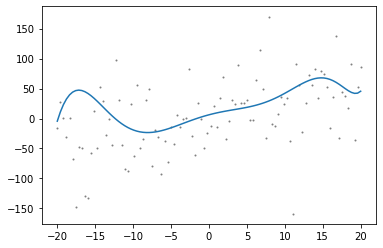

In [106]:
polynomial_regression_regularized(X_train, y_train, X_test, y_test, 10, noise=True)

Lasso performs better
Let's try with MLP and Random Forest regressors

In [107]:
from sklearn.neural_network import MLPRegressor

def MLP_regression(X_train, y_train, X_test, y_test, noise=False):
    if noise:
        y_train = inject_noise(y_train)
        y_test = inject_noise(y_test)
        
    mlp = MLPRegressor(max_iter=200000)
    mlp.fit(X_train[:, np.newaxis], y_train)
    
    plt.scatter(X_train, y_train, s=1, c='grey')
    plt.scatter(X_test, y_test, s=1, c='grey')
    plot_regression_line(mlp, label='MLP', start=-tr, stop=tr)
    print(r2_score(y_test, mlp.predict(X_test[:, np.newaxis])))
    

0.1389219802076902


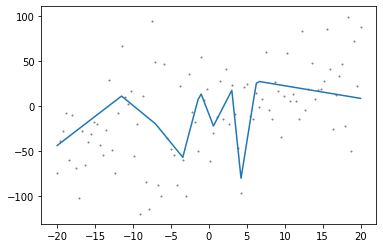

In [108]:
MLP_regression(X_train, y_train, X_test, y_test, noise=True)

In [109]:
from sklearn.ensemble import RandomForestRegressor

def RF_regression(X_train, y_train, X_test, y_test, noise=False):
    if noise:
        y_train = inject_noise(y_train)
        y_test = inject_noise(y_test)
    
    rf = RandomForestRegressor()
    rf.fit(X_train[:, np.newaxis], y_train)
    
    plt.scatter(X_train, y_train, s=1, c='grey')
    plt.scatter(X_test, y_test, s=1, c='grey')
    plot_regression_line(rf, label='RF', start=-tr, stop=tr)
    print(r2_score(y_test, rf.predict(X_test[:, np.newaxis])))

/home/toyo/Programs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.27391997423589887


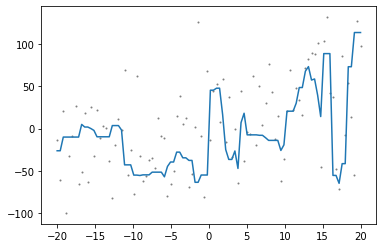

In [110]:
RF_regression(X_train, y_train, X_test, y_test, noise=True)

Let's try other functions

## 2)
$$f_2(x) = 10sin(x) + x^2$$

In [111]:
y = 10 * np.sin(X) + np.power(X, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=30,
                                                    random_state=42,
                                                    shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

Lasso features: [ 0.00000000e+00 -2.43211933e+00  6.84152630e-01  3.71524676e-03
  4.77119013e-04  1.42036974e-05  5.53890273e-07  2.07446319e-08
  7.36519235e-10  2.75294762e-11  8.88067392e-13]
Lasso, degree = 10
0.7426826730813758
0.791576906845904
0.7226910240102166


/home/toyo/Programs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


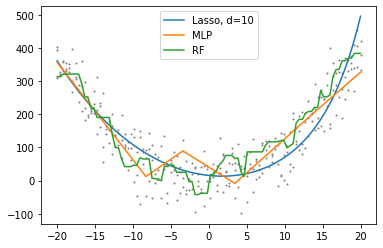

In [113]:
polynomial_regression_regularized(X_train, y_train, X_test, y_test, 10, True)
MLP_regression(X_train, y_train, X_test, y_test, True)
RF_regression(X_train, y_train, X_test, y_test, True)
plt.legend()
plt.show()

In [66]:
y = np.sign(X) * (np.power(X, 2) + 300) + 20 * np.sin(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=30,
                                                    random_state=42,
                                                    shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

Lasso features: [ 0.00000000e+00  3.86690228e+01 -3.41966242e-01 -9.65652807e-03
  3.24218406e-04 -3.14824235e-06  2.26820203e-07  2.71411233e-09
  3.32382835e-10  1.00912509e-11  6.57216531e-13]
Lasso, degree = 10
0.9212548002687316
0.947312263206534
0.9810822349554762


/home/toyo/Programs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


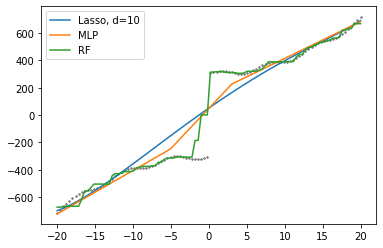

In [67]:
polynomial_regression_regularized(X_train, y_train, X_test, y_test, 10, True)
MLP_regression(X_train, y_train, X_test, y_test, True)
RF_regression(X_train, y_train, X_test, y_test, True)
plt.legend()
plt.show()

In [83]:
y = 2 * np.sin(X) + X + np.power(X, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=30,
                                                    random_state=42,
                                                    shuffle=True)

X_train = np.stack((X_train, np.sin(X_train)), axis=-1)
y_test = y_test[X_test.argsort()]
X_test.sort()

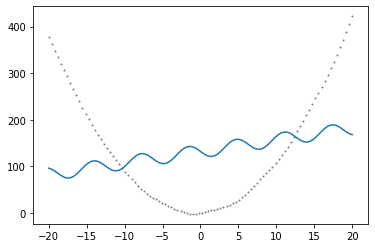

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)
X_sin = np.stack((X, np.sin(X)), axis=-1) 
plt.plot(X, lr.predict(X_sin))
plt.scatter(X, y, s=1, c='grey')

In [87]:
r2_score(y_test, lr.predict(np.stack((X_test, np.sin(X_test)), axis=-1)))



-0.056770318007569376